In [ ]:
# Environment:- Google Colab
!pip install fastdtw
# Installing required libraries

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [ ]:
# Funection which will normalise the values
def normalize(ts):
    return (ts - ts.min()) / (ts.max() - ts.min())

In [ ]:
# Defination of funection to compute dwt distances
def dtw_distance(ts1, ts2):
    ts1_normalized = normalize(ts1)
    ts2_normalized = normalize(ts2)
    distance, _ = fastdtw(ts1_normalized.reshape(-1, 1), ts2_normalized.reshape(-1, 1), dist=euclidean)
    return distance

In [ ]:
#  Based on previous distance values this funection willl find the similar patterns/ closest pattern
def find_most_similar_pattern(n_miniutes):
    current_window = price_data_pct_change[-n_miniutes:].values
    # Adjust to find and store at max 5 patterns
    min_distances = [(float('inf'), -1) for _ in range(5)]
    # min_distanes=[]
    for start_index in range(len(price_data_pct_change) - 2 * n_miniutes - subsequent_miniutes):
        past_window = price_data_pct_change[start_index:start_index + n_miniutes].values
        distance = dtw_distance(current_window, past_window)
        index=start_index
        for i, (min_distance, _) in enumerate(min_distances):
            if distance < min_distance:
                min_distances[i] = (distance, start_index)
                start_index=start_index+n_miniutes
                break
        # if len(min_distances)==5:
        #   for i in range(len(min_distances)):
        #     if min_distances[i][0]<distance:
        #       distance,index=min_distances[i][0],min_distances[i][1]
        # else:
        #   min_distances.append((distance,index))

    res=[]

    for i in range (0,len(min_distances)):

      flag = True
      for j in range (0,len(res)):

        if abs(res[j][1]-min_distances[i][1])<(n_miniutes//2):
          # print(min_distances[i],abs(res[j][0]-min_distances[i][0]))
          flag=False
          break

      if flag:
        res.append(min_distances[i])

    return res

In [ ]:
# Using Yfinance Library retrive the data
ticker = "YCA.L"
start_date = '2000-01-01'
end_date = '2023-07-21'
# data = yf.download(ticker, start=start_date, end=end_date)
#  Here data is used for initial computation / Traning data set
data=yf.download(ticker,start='2023-10-06',end='2023-10-12',interval='2m')


# Transform price data into returns
price_data = data['Close']
price_data_pct_change = price_data.pct_change().dropna()

# Differnt Time frame Windows to find patterns on
miniutes_to = [15, 20, 30]

# Number of days for price development observation/ for which prediction is done
subsequent_miniutes = 20

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-06 08:00:00+01:00,537.500000,540.000000,524.000000,524.000000,524.000000,25171
2023-10-06 08:02:00+01:00,526.159973,526.159973,526.159973,526.159973,526.159973,341
2023-10-06 08:08:00+01:00,529.500000,529.500000,523.500000,524.000000,524.000000,23239
2023-10-06 08:10:00+01:00,525.261475,525.261475,525.261475,525.261475,525.261475,83
2023-10-06 08:12:00+01:00,525.578979,525.578979,525.578979,525.578979,525.578979,285
...,...,...,...,...,...,...
2023-10-11 16:20:00+01:00,510.000000,510.500000,508.500000,508.500000,508.500000,15177
2023-10-11 16:22:00+01:00,509.279510,509.500000,508.500000,508.500000,508.500000,8113
2023-10-11 16:24:00+01:00,508.720490,509.500000,508.500000,509.500000,509.500000,15543


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(data, *['Open', 'High'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(data, *['High', 'Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(data, *['Low', 'Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(data, *['Close', 'Adj Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['Close'], **{})
chart

In [ ]:
# this is data prepration for testing purpose / Testing data set
md = yf.download(ticker,start='2023-10-12',end='2023-10-15',interval='2m')
market_data=[]
for i in range(len(md)):
  price=md['Close'][i]
  market_data.append(price)
market_data

[*********************100%%**********************]  1 of 1 completed


[519.0,
 515.0,
 514.4000244140625,
 514.7999877929688,
 514.5980224609375,
 516.0,
 516.0,
 516.0,
 514.0,
 513.3400268554688,
 515.5,
 516.5,
 516.0,
 514.5,
 515.6799926757812,
 516.1699829101562,
 516.0,
 516.0,
 515.1699829101562,
 516.0,
 515.510009765625,
 516.0,
 514.5,
 515.5,
 516.5,
 517.5,
 517.510009765625,
 517.52587890625,
 518.510009765625,
 518.510009765625,
 518.0252075195312,
 519.5,
 519.0,
 519.0,
 518.8400268554688,
 518.5,
 519.0,
 519.0,
 518.0,
 518.0,
 519.0,
 518.5,
 519.0,
 519.2000122070312,
 520.010009765625,
 520.5,
 520.0,
 520.0,
 518.5,
 518.5,
 518.5,
 518.3400268554688,
 518.0,
 518.0,
 518.0,
 519.0,
 519.0,
 518.35009765625,
 517.5,
 517.0,
 517.1690063476562,
 517.5,
 516.8300170898438,
 517.5,
 517.0,
 517.0,
 517.0,
 517.5,
 517.5,
 517.1690063476562,
 517.1699829101562,
 517.5,
 517.5,
 518.5,
 518.5,
 518.0,
 517.6699829101562,
 518.5,
 519.0,
 518.5,
 517.7100219726562,
 517.0,
 516.5,
 516.8997802734375,
 518.0,
 519.5,
 518.6699829101562,
 

In [ ]:
price_data.index=price_data.index.astype(str)

In [ ]:
predicted_prices=[]

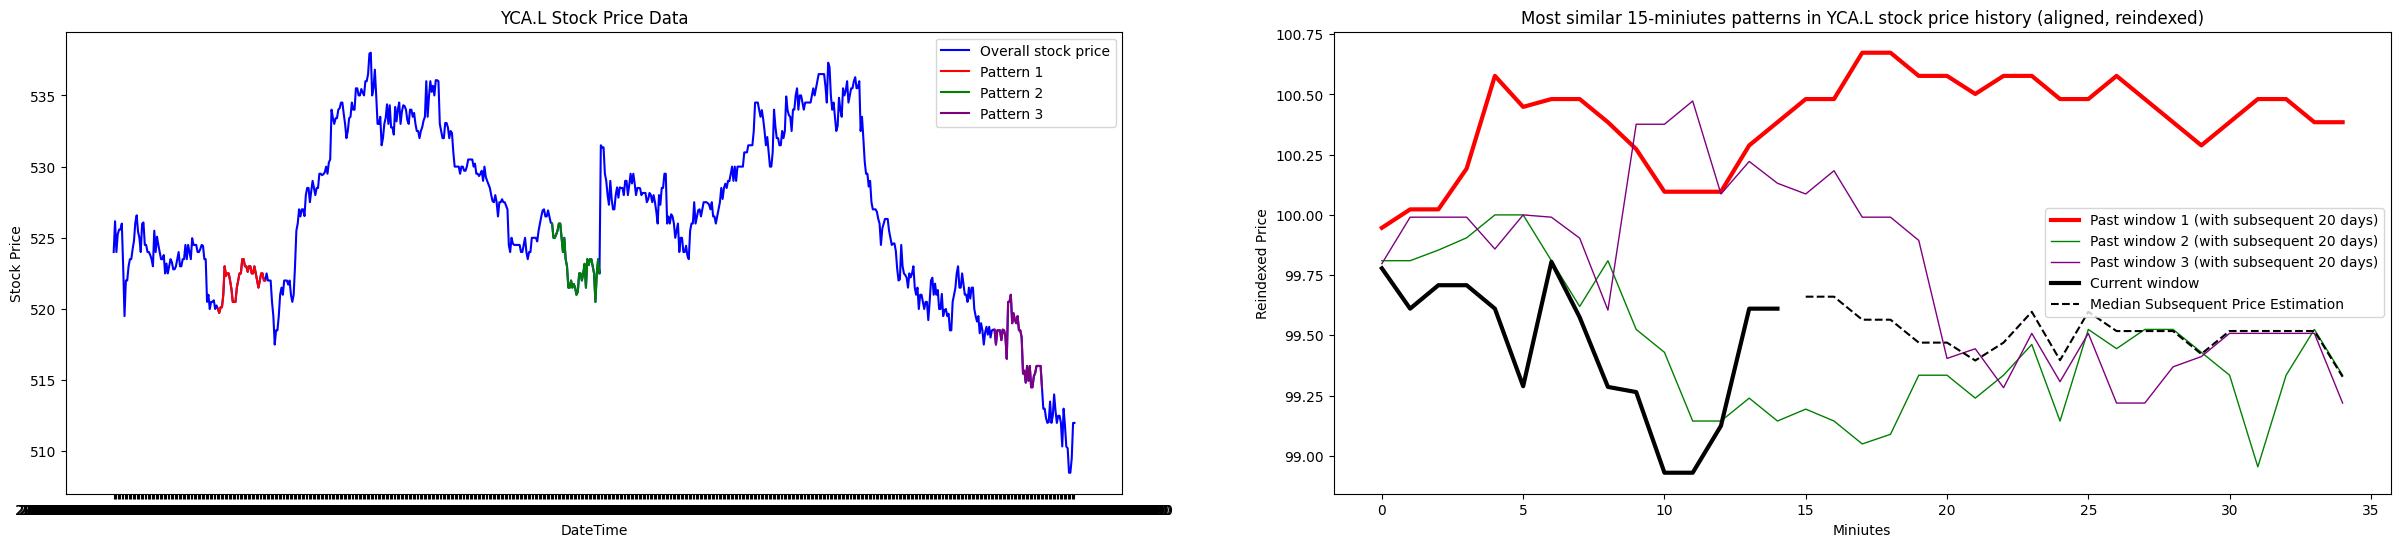

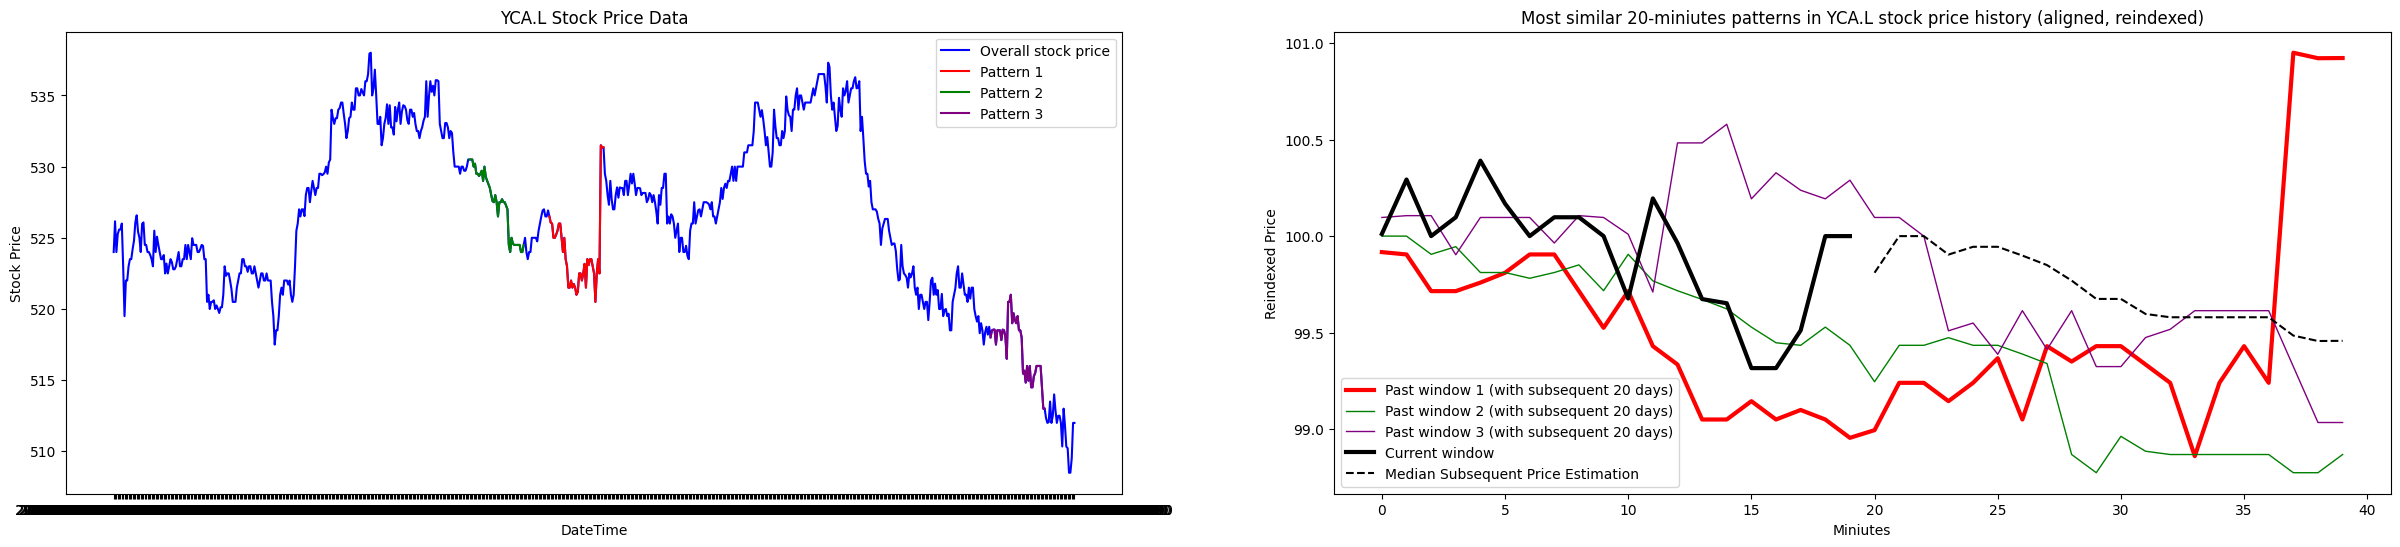

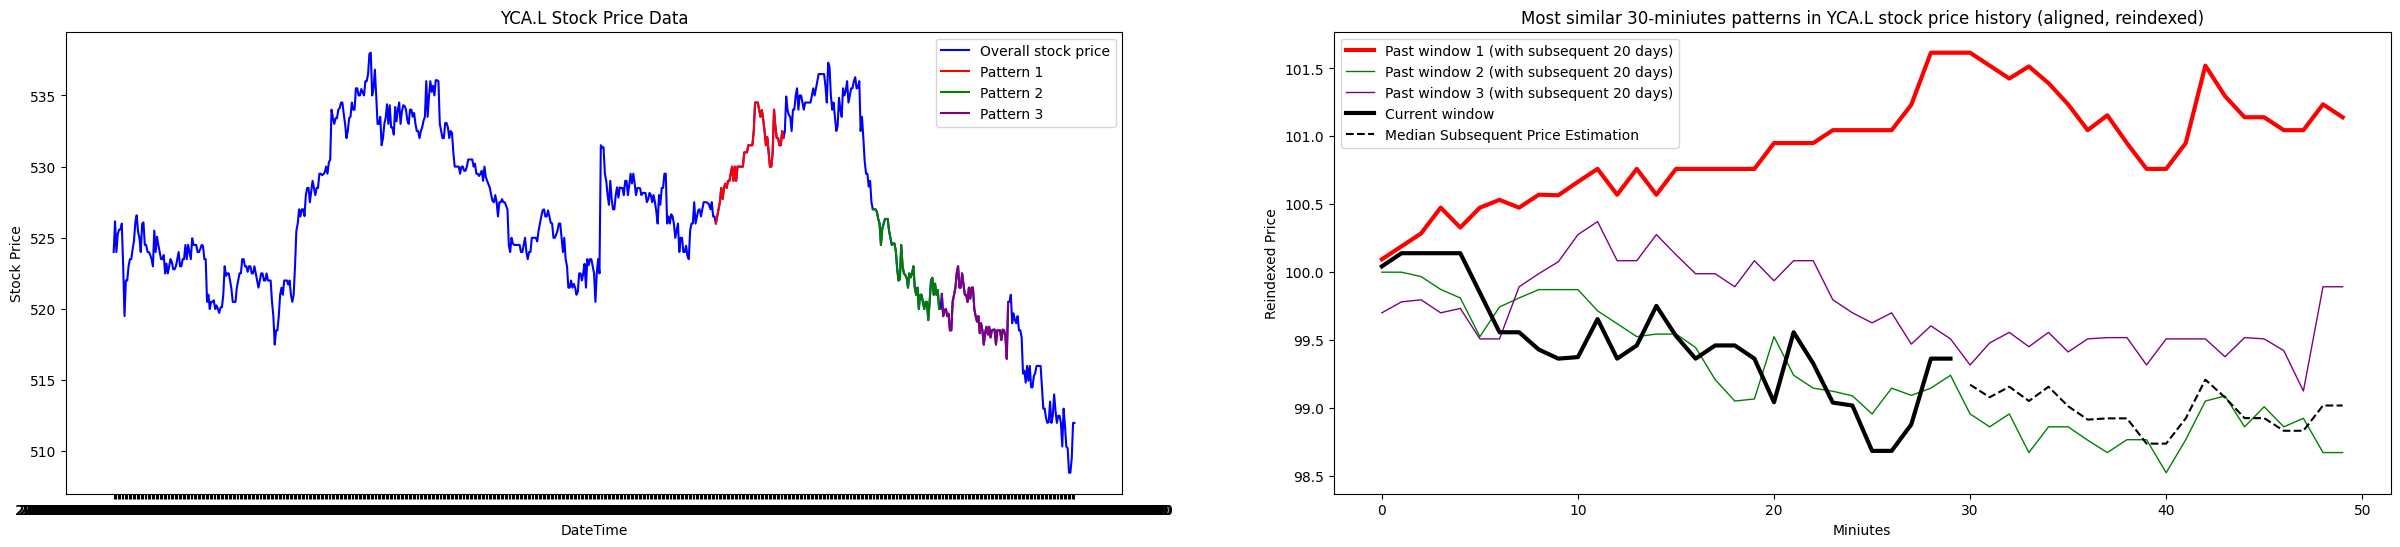

In [ ]:
# This will find the pattern based on previous data and select atmost 5 trendline
# using median values system we will predict our future stock prices
for n_miniutes in miniutes_to:
    # print(n_miniutes)
    min_distances = find_most_similar_pattern(n_miniutes)
    # print(min_distances)
    # print(n_miniutes,min_distances)
    fig, axs = plt.subplots(1, 2, figsize=(30, 6))
    X=data.index.astype(str)
    axs[0].plot(price_data, color='blue', label='Overall stock price')
    color_cycle = ['red', 'green', 'purple', 'orange', 'cyan']
    subsequent_prices = []

    for i, (_, start_index) in enumerate(min_distances):
        color = color_cycle[i % len(color_cycle)]
        past_window_start_date = price_data.index[start_index]
        past_window_end_date = price_data.index[start_index + n_miniutes + subsequent_miniutes]
        # print(past_window_start_date,past_window_end_date)

        axs[0].plot(price_data[past_window_start_date:past_window_end_date], color=color, label=f"Pattern {i + 1}")
        # Store subsequent prices for median calculation
        subsequent_window = price_data_pct_change[start_index + n_miniutes : start_index + n_miniutes + subsequent_miniutes].values
        subsequent_prices.append(subsequent_window)

    axs[0].set_title(f'{ticker} Stock Price Data')
    axs[0].set_xlabel('DateTime')
    axs[0].set_ylabel('Stock Price')
    axs[0].legend()

    for i, (_, start_index) in enumerate(min_distances):
        color = color_cycle[i % len(color_cycle)]
        past_window = price_data_pct_change[start_index:start_index + n_miniutes + subsequent_miniutes]
        reindexed_past_window = (past_window + 1).cumprod() * 100
        axs[1].plot(range(n_miniutes + subsequent_miniutes), reindexed_past_window, color=color, linewidth=3 if i == 0 else 1, label=f"Past window {i + 1} (with subsequent {subsequent_miniutes} days)")

    reindexed_current_window = (price_data_pct_change[-n_miniutes:] + 1).cumprod() * 100
    axs[1].plot(range(n_miniutes), reindexed_current_window, color='k', linewidth=3, label="Current window")

    # Compute and plot the median subsequent prices
    subsequent_prices = np.array(subsequent_prices)
    median_subsequent_prices = np.median(subsequent_prices, axis=0)
    median_subsequent_prices_cum = (median_subsequent_prices + 1).cumprod() * reindexed_current_window.iloc[-1]
    predicted_prices.append(median_subsequent_prices_cum)
    axs[1].plot(range(n_miniutes, n_miniutes + subsequent_miniutes), median_subsequent_prices_cum, color='black', linestyle='dashed', label="Median Subsequent Price Estimation")
    axs[1].set_title(f"Most similar {n_miniutes}-miniutes patterns in {ticker} stock price history (aligned, reindexed)")
    axs[1].set_xlabel("Miniutes")
    axs[1].set_ylabel("Reindexed Price")
    axs[1].legend()

    plt.show()

In [ ]:
predicted_prices

[array([99.660559  , 99.660559  , 99.56500717, 99.56500717, 99.46991165,
        99.46991165, 99.39573436, 99.46991165, 99.59778368, 99.39708354,
        99.59778368, 99.5178804 , 99.5178804 , 99.5178804 , 99.42282989,
        99.51815379, 99.51815379, 99.51815379, 99.51815379, 99.32805226]),
 array([ 99.81042654, 100.        , 100.        ,  99.90430622,
         99.94468056,  99.94468056,  99.89920995,  99.84994626,
         99.76984068,  99.67473121,  99.67473121,  99.59689509,
         99.57980289,  99.57980289,  99.57980289,  99.57980289,
         99.57980289,  99.48487458,  99.45679337,  99.45773017]),
 array([99.1719166 , 99.07914587, 99.15654192, 99.05141442, 99.15654192,
        99.01318306, 98.91446061, 98.92371735, 98.92386872, 98.73757141,
        98.73757141, 98.92386872, 99.20895191, 99.07788559, 98.92540522,
        98.92540522, 98.83243021, 98.83243021, 99.01838022, 99.01838022])]

In [ ]:
cp=price_data[-1] # cp represent current most recent price in traning data set
actual_pp=[]
print(cp)

512.0


In [ ]:
# here we will compute the actual price of data from predicted percentage value of data
i=0
for t1 in predicted_prices:
  pp=price_data[-(miniutes_to[i])]
  var=float
  var=((cp*100)/pp)
  i=i+1
  print(var)
  app=[]
  for prices in t1:
    app.append((cp*prices)/var)
  actual_pp.append(app)


99.83223259652695
99.98867639987708
99.32104752667313


In [ ]:
actual_pp

[[511.1195540747919,
  511.1195540747919,
  510.6295065636943,
  510.6295065636943,
  510.14179929859046,
  510.14179929859046,
  509.76137334351074,
  510.14179929859046,
  510.79760429696455,
  509.76829275616245,
  510.79760429696455,
  510.387812005936,
  510.387812005936,
  510.387812005936,
  509.90033558568194,
  510.3892141432905,
  510.3892141432905,
  510.3892141432905,
  510.3892141432905,
  509.4142586243921],
 [511.0872573635589,
  512.0579833984375,
  512.0579833984375,
  511.5679757588217,
  511.7747157800483,
  511.7747157800483,
  511.54187988623363,
  511.2896212627212,
  510.8794342463495,
  510.3924185797658,
  510.3924185797658,
  509.993852513499,
  509.9063305620707,
  509.9063305620707,
  509.9063305620707,
  509.9063305620707,
  509.9063305620707,
  509.42024254437575,
  509.2764504965878,
  509.28124746482155],
 [511.23123009186963,
  510.7529969486593,
  511.15197358089955,
  510.6100413479909,
  511.15197358089955,
  510.41295867933684,
  509.9040444196359,


Here Stimulate Predicted Prices on Market Data/ Actual Data

In [ ]:
for k in range(0,3):
# Simulated predicted prices
  predicted_prices = actual_pp[k]  # Simulated predicted prices for 15 min data frame
  print("\nThis Output for",miniutes_to[k],"miniutes Data Frame")
  # Defining Trading strategy parameters
  take_profit = 1.0099 # 0.99% gain
  stop_loss = 0.99  # 0.7% loss
  initial_balance = 10000  # Initial account balance
  position_size = 1000  # Size of each position

  # Initialize trading variables
  balance = initial_balance
  positions = []
  trade_stats = {'win': 0, 'loss': 0, 'hit_ratio': 0.0, 'risk_reward': 0.0, 'max_drawdown': 0.0}
  equity_curve = []

  # Implement the trading strategy
  for i in range(len(predicted_prices)):
      market_price = market_data[i]
      predicted_price = predicted_prices[i]
      position = {'entry_price': market_price, 'position_size': position_size}

      if market_price >= predicted_price * take_profit:
          # Take profit
          position['exit_price'] = market_price
          balance += position['position_size'] * (market_price / position['entry_price'])
          trade_stats['win'] += 1
      elif market_price <= predicted_price * stop_loss:
          # Stop-loss
          position['exit_price'] = market_price
          balance -= position['position_size'] * (market_price / position['entry_price'])
          trade_stats['loss'] += 1
      else:
          # No action
          position['exit_price'] = market_price

      positions.append(position)
      equity_curve.append(balance)

  # Calculate trading performance metrics
  total_trades = trade_stats['win'] + trade_stats['loss']
  trade_stats['hit_ratio'] = trade_stats['win'] / total_trades if total_trades > 0 else 0
  trade_stats['risk_reward'] = (balance - initial_balance) / (initial_balance * trade_stats['loss']) if trade_stats['loss'] > 0 else 0
  trade_stats['max_drawdown'] = min(equity_curve) / initial_balance - 1



  # # Print trading performance metrics
  print("Hit Ratio:", trade_stats['hit_ratio'])
  print("Risk Reward Ratio:", trade_stats['risk_reward'])
  print("Max Drawdown:", trade_stats['max_drawdown'])

  # Plot the equity curve
  plt.plot(equity_curve)
  plt.xlabel("Trade Number")
  plt.ylabel("Equity")
  plt.title("Equity Curve")
  plt.show()



This Output for 15 miniutes Data Frame
Hit Ratio: 1.0
Risk Reward Ratio: 0
Max Drawdown: 0.10000000000000009
Sharpe Ratio: 16.11028689361211
Calmar Ratio: -88.70020715800402
Final balance 21000.0 



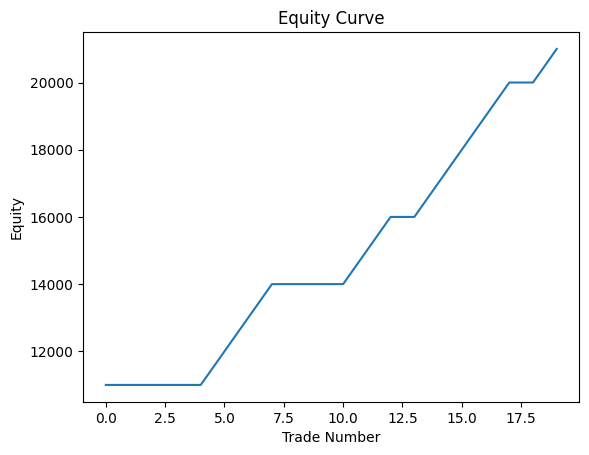


This Output for 20 miniutes Data Frame
Hit Ratio: 1.0
Risk Reward Ratio: 0
Max Drawdown: 0.10000000000000009
Sharpe Ratio: 14.62434517315466
Calmar Ratio: -82.06862821063561
Final balance 20000.0 



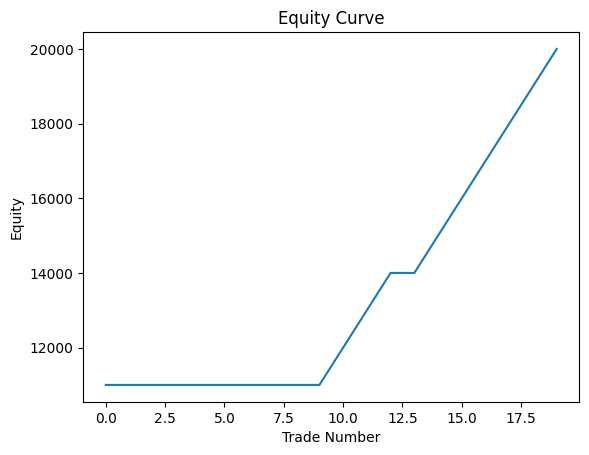


This Output for 30 miniutes Data Frame
Hit Ratio: 1.0
Risk Reward Ratio: 0
Max Drawdown: 0.10000000000000009
Sharpe Ratio: 16.11028689361211
Calmar Ratio: -88.70020715800402
Final balance 21000.0 



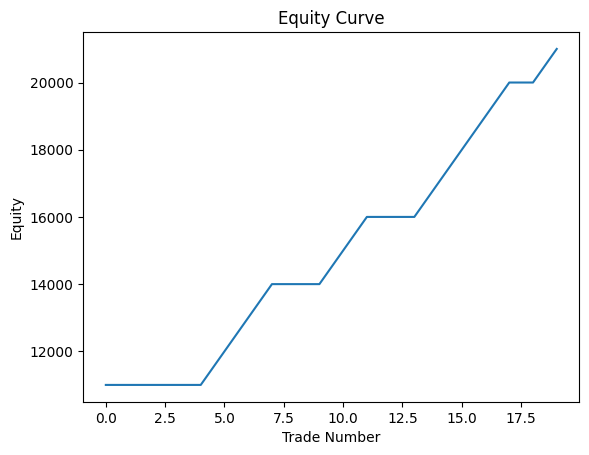

In [ ]:
for k in range(0,3):
# Simulated predicted prices
  predicted_prices = actual_pp[k]  # Simulated predicted prices for 15 min data frame
  print("\nThis Output for",miniutes_to[k],"miniutes Data Frame")
  # Defining Trading strategy parameters
  take_profit = 1.0099 # 0.99% gain
  stop_loss = 0.99  # 0.7% loss
  initial_balance = 10000  # Initial account balance
  position_size = 1000  # Size of each position

  # Initialize trading variables
  balance = initial_balance
  positions = []
  trade_stats = {'win': 0, 'loss': 0, 'hit_ratio': 0.0, 'risk_reward': 0.0, 'max_drawdown': 0.0}
  equity_curve = []
  daily_returns = []
  # Implement the trading strategy
  for i in range(len(predicted_prices)):
      market_price = market_data[i]
      predicted_price = predicted_prices[i]
      position = {'entry_price': market_price, 'position_size': position_size}

      if market_price >= predicted_price * take_profit:
          # Take profit
          position['exit_price'] = market_price
          balance += position['position_size'] * (market_price / position['entry_price'])
          trade_stats['win'] += 1
      elif market_price <= predicted_price * stop_loss:
          # Stop-loss
          position['exit_price'] = market_price
          balance -= position['position_size'] * (market_price / position['entry_price'])
          trade_stats['loss'] += 1
      else:
          # No action
          position['exit_price'] = market_price

      positions.append(position)
      equity_curve.append(balance)
        # Calculate daily returns for Sharpe Ratio
      if len(equity_curve) > 1:
        daily_return = (equity_curve[-1] / equity_curve[-2]) - 1
        daily_returns.append(daily_return)

  total_trades = trade_stats['win'] + trade_stats['loss']
  trade_stats['hit_ratio'] = trade_stats['win'] / total_trades if total_trades > 0 else 0
  trade_stats['risk_reward'] = (balance - initial_balance) / (initial_balance * trade_stats['loss']) if trade_stats['loss'] > 0 else 0
  trade_stats['max_drawdown'] = min(equity_curve) / initial_balance - 1

    # Calculate Sharpe Ratio
  daily_returns = np.array(daily_returns)
  avg_daily_return = np.mean(daily_returns)
  std_daily_return = np.std(daily_returns)
  sharpe_ratio = (avg_daily_return / std_daily_return) * np.sqrt(252)  # Assuming 252 trading days in a year

    # Calculate Calmar Ratio
  calmar_ratio = (avg_daily_return * 252) / (trade_stats['max_drawdown'] * -1)

    # Print trading performance metrics
  print("Hit Ratio:", trade_stats['hit_ratio'])
  print("Risk Reward Ratio:", trade_stats['risk_reward'])
  print("Max Drawdown:", trade_stats['max_drawdown'])
  print("Sharpe Ratio:", sharpe_ratio)
  print("Calmar Ratio:", calmar_ratio)
  print("Final balance",balance,"\n")
  # Plot the equity curve
  plt.plot(equity_curve)
  plt.xlabel("Trade Number")
  plt.ylabel("Equity")
  plt.title("Equity Curve")
  plt.show()


ValueError: ignored